In [1]:
import main
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import time
import sklearn
import keras

Using TensorFlow backend.


# MNIST Using ANN Network

In [1]:
import main
import keras

#Load mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Rescale X
x_train /= 255
x_test /= 255
#Number of classes
num_classes = 10

#Convert to one hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Create model
a = main.ANN(
        network_sizes = [150,50],
        loss = 'categorical_crossentropy', 
        optimizer = 'adam',
        activation = 'relu',
        metrics = ['accuracy'],
        n_out = 10
        )    

#Train model
a.fit_model(
        x_train.reshape(-1,(28*28)).astype('float32'),
        y_train,
        batch_size = 400,
        epochs = 4,
        validation_split = 0.01
        )

#Evaluate model
a.eval(
        x_test.reshape(-1,(28*28)).astype('float32'),
        y_test
        )

Using TensorFlow backend.


Train on 59400 samples, validate on 600 samples
Epoch 1/4
59400/59400 [==============================] - 3s 44us/step - loss: 0.3860 - acc: 0.8858 - val_loss: 0.1564 - val_acc: 0.9617
Epoch 2/4
59400/59400 [==============================] - 2s 38us/step - loss: 0.1330 - acc: 0.9608 - val_loss: 0.1442 - val_acc: 0.9700
Epoch 3/4
59400/59400 [==============================] - 2s 29us/step - loss: 0.0837 - acc: 0.9758 - val_loss: 0.1423 - val_acc: 0.9717
Epoch 4/4
10000/10000 [==============================] - 0s 34us/step


[0.09290625496208668, 0.9718]

# MNIST Using CNN Network

In [17]:
#Load mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Rescale X
x_train /= 255
x_test /= 255

#Number of classes
num_classes = 10

#Convert to one hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = CNN(
        network_sizes = [50,25],
        filters = [5,5],
        kernels = [(4,4),(2,2)],
        pool_size = (2,2),
        activation='relu',
        dropout=0,
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'],
        n_out = 10
    )

model.fit_model(
        x = x_train.reshape(-1,28,28,1),
        y = y_train,
        batch_size = 200,
        epochs = 5,
        validation_split = 0.01,
        verbose = 1
)

Train on 59400 samples, validate on 600 samples
Epoch 1/5
59400/59400 [==============================] - 22s 373us/step - loss: 0.3643 - acc: 0.8984 - val_loss: 0.1220 - val_acc: 0.9667
Epoch 2/5
59400/59400 [==============================] - 19s 328us/step - loss: 0.0881 - acc: 0.9738 - val_loss: 0.0981 - val_acc: 0.9750
Epoch 3/5
59400/59400 [==============================] - 22s 364us/step - loss: 0.0578 - acc: 0.9829 - val_loss: 0.0885 - val_acc: 0.9783
Epoch 4/5
59400/59400 [==============================] - 23s 381us/step - loss: 0.0428 - acc: 0.9869 - val_loss: 0.0864 - val_acc: 0.9833
Epoch 5/5
59400/59400 [==============================] - 22s 367us/step - loss: 0.0324 - acc: 0.9902 - val_loss: 0.0934 - val_acc: 0.9783


# MNIST Using RNN Network

In [1]:
import main
import keras

#Load mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Rescale X
x_train /= 255
x_test /= 255

#Number of classes
num_classes = 10

#Convert to one hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = main.RNN(
    network_sizes = [30,15],
    lstm_cells = [28],
    activation='relu',
    rnn_type = 'GRU',
    dropout = 0.1,
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
    n_out = 10
)

model.fit_model(
    x = x_train,
    y = y_train,
    batch_size = 200,
    epochs = 5,
    validation_split = 0.01,
    verbose = 1
)



Using TensorFlow backend.


Train on 59400 samples, validate on 600 samples
Epoch 1/5
59400/59400 [==============================] - 9s 155us/step - loss: 1.6634 - acc: 0.4077 - val_loss: 1.0522 - val_acc: 0.6200
Epoch 2/5
59400/59400 [==============================] - 7s 117us/step - loss: 0.9813 - acc: 0.6523 - val_loss: 0.5316 - val_acc: 0.8033
Epoch 3/5
59400/59400 [==============================] - 7s 114us/step - loss: 0.6466 - acc: 0.7819 - val_loss: 0.3317 - val_acc: 0.8850
Epoch 4/5
59400/59400 [==============================] - 7s 122us/step - loss: 0.4747 - acc: 0.8476 - val_loss: 0.2335 - val_acc: 0.9167
Epoch 5/5
59400/59400 [==============================] - 7s 117us/step - loss: 0.3565 - acc: 0.8908 - val_loss: 0.1732 - val_acc: 0.9517


# Multistep RNN

In [2]:
import main
import numpy as np
from matplotlib import pyplot as plt

points = np.linspace(start = 0,stop = 10 * np.pi, num = 5000000)

x = np.sin(points[:-25])

y = np.sin(points[25:])

X = x.reshape(-1,25,1)
Y = y.reshape(-1,25,1)

model = main.RNN_multistep(
    network_sizes = [30,15],
    lstm_cells = [15],
    activation='relu',
    rnn_type = 'gru',
    dropout = 0.1,
    crop = (5,0),
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = None,
    n_out = 1  
)

model.fit_model(
    x = X,
    y = Y,
    batch_size = 2000,
    epochs = 1,
    validation_split = 0.01,
    verbose = 1
)

pred = model.predict(X)

plt.plot(Y[:,5:].reshape(-1))

plt.plot(pred.reshape(-1))

plt.show()

Train on 197999 samples, validate on 2000 samples
Epoch 1/1
197999/197999 [==============================] - 18s 90us/step - loss: 0.3447 - val_loss: 0.0053


<Figure size 640x480 with 1 Axes>

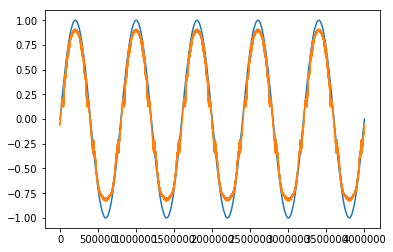

In [4]:
plt.plot(Y[:,5:].reshape(-1))

plt.plot(pred.reshape(-1))

plt.show()